In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
def sub_Dict():
    sub_Dict = dict({99: ['797','806','809','826','843','845','855','856','857'], 
                 114: ['1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934'],
        177:['2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377',
            '2378','2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
            '2401','2402','2404','2405','2407','2434','2444','2456',
             '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']}) 
    return sub_Dict

def GetCohort(subID):
    subDict = sub_Dict()
    for key, value in subDict.items():
        if subID in value:
            return key
        
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID

In [7]:
pc3_all = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/pc3_score_cencored.csv")
week_list = ['week1','week2','week3','week4','week5','week6','week7','week8']
for col in week_list:
    pc3_all.loc[pc3_all[col]>100, col] = 100
    
sleep_177 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_177.csv")
sleep_114 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_114.csv")
sleep_99 = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/sleep_weekly_99.csv")
sleep_all = pd.concat([sleep_99,sleep_114, sleep_177])


In [13]:
R = ['843','856','857','1031','1381','1435','1465','1492',
     '1493','1519','1520','1721','2340','2378','2387','2401','2444','2447','3053']

sleep_all = sleep_all[~sleep_all['Unnamed: 0'].isin(R)]
for col in week_list:
    
    pc3_all.loc[pc3_all[col]>100, col] = 100
    pc3_all.loc[pc3_all[col]<-100,col] = -100

pc3_reversed = pc3_all.iloc[:, ::-1]
sleep_reversed = sleep_all.iloc[:, ::-1]

In [14]:
pc3_reversed

,week8,week7,week6,week5,week4,week3,week2,week1,subID,Unnamed: 0
0,-100.000000,20.190220,-100.000000,-3.646585,-9.163280,21.201006,15.867169,16.780593,797,0
1,11.614521,10.172449,13.579907,15.196020,20.396713,20.728622,-100.000000,-0.402736,806,1
2,-100.000000,-5.480796,-3.384283,6.595095,9.417389,5.385507,21.739397,17.021356,809,2
3,-100.000000,15.656053,-21.007143,-8.910079,-100.000000,-0.698543,20.927096,15.850610,826,3
4,39.195563,43.248581,38.514745,40.368849,-100.000000,25.604666,5.849210,28.405225,845,4
5,30.397531,49.065614,46.208767,45.117805,45.219025,46.622350,44.806566,34.130455,855,5
6,41.692706,41.343585,41.821497,43.355470,41.360915,42.412599,26.475154,40.319475,1153,6
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154,7
8,25.946426,25.730525,13.949713,24.094996,-46.850008,-10.481147,16.698321,29.637890,1157,8
9,-11.034072,16.967506,17.652745,17.825413,25.286319,25.923976,-100.000000,32.457766,1174,9


In [16]:
df_list = []
nan_list = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
label = ['sleep_t-1','sleep_t-2','sleep_t-3','sleep_t-4','sleep_t-5','sleep_t-6','sleep_t-7']
vac = ['pc_t-1','pc_t-2','pc_t-3','pc_t-4','pc_t-5','pc_t-6','pc_t-7']

for n in range(96):
    df = pd.DataFrame({'subID':sleep_all.iloc[n][0],'const':np.ones(7),'sleep_t-1' : nan_list,'sleep_t-2' : nan_list,'sleep_t-3' : nan_list,'sleep_t-4' : nan_list,'sleep_t-5' : nan_list,
                 'sleep_t-6' : nan_list,'sleep_t-7' : nan_list,'pc_t-1' : nan_list,'pc_t-2' : nan_list,'pc_t-3' : nan_list,
                  'pc_t-4' : nan_list,'pc_t-5' : nan_list,'pc_t-6' : nan_list,'pc_t-7' : nan_list,'Y':nan_list},index=['t-1', 't-2', 't-3' , 't-4' , 't-5' ,'t-6','t-7' ])

    for i in range(7):
        df[label[i]].iloc[0:7-i] = sleep_reversed.iloc[n][1+i:8].tolist()
        df[vac[i]].iloc[0:7-i] = pc3_reversed.iloc[n][1+i:8].tolist()

        df['Y'].iloc[0:7] = pc3_reversed.iloc[n][0:7].tolist()
    df_list.append(df)
regression_df = pd.concat(df_list)
regression_df = regression_df[~regression_df.subID.isin([1174,1154,1467,1468,2378])]
t_1regression = regression_df[['subID','Y','sleep_t-4','pc_t-4','sleep_t-3','pc_t-3','sleep_t-2','pc_t-2','sleep_t-1','pc_t-1']]

t_1regression = pd.get_dummies(t_1regression, columns=['subID'])

In [17]:
Y = t_1regression['Y']
X = t_1regression[t_1regression.columns[7:]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params
results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4.814
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           6.42e-32
Time:                        22:35:29   Log-Likelihood:                -3257.3
No. Observations:                 644   AIC:                             6703.
Df Residuals:                     550   BIC:                             7123.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.5756      9.612     -2.661      0.008     -44.456      -6.696
sleep_t-1        2.5412      1.081      2.350      0.019       0.417       4.665
pc_t-1          -0.1114      0.041     -2.709      0.007      -0.192      -0.031
subID_797.0    -17.1390     15.514     -1.105      0.270     -47.612      13.334
subID_806.0      2.0107     15.480      0.130      0.897     -28.396      32.417
subID_809.0     -3.7354     15.497     -0.241      0.810     -34.176      26.705
subID_826.0    -26.2587     15.486     -1.696      0.091     -56.678       4.160
subID_845.0     21.8933     15.583      1.405      0.161      -8.716      52.502
subID_855.0     51.0339     15.604      3.271      0.001      20.384      81.684
subID_1153.0    49.4377     15.593      3.171      0.002      18.809      80.066
subID_1157.0     9.4688     15.501      0.611      0.542     -20.979      39.917
subID_1262.0   -27.3235     15.542     -1.758      0.079     -57.853       3.206
subID_1264.0    22.9303     15.849      1.447      0.149      -8.201      54.062
subID_1266.0    -7.0869     15.525     -0.456      0.648     -37.583      23.409
subID_1364.0    42.0984     15.502      2.716      0.007      11.648      72.549
subID_1367.0    18.9028     15.560      1.215      0.225     -11.661      49.467
subID_1379.0    33.9830     16.488      2.061      0.040       1.596      66.370
subID_1380.0    36.7503     15.708      2.340      0.020       5.895      67.606
subID_1384.0     7.8731     15.655      0.503      0.615     -22.877      38.623
subID_1489.0   -34.3953     15.594     -2.206      0.028     -65.026      -3.765
subID_1494.0    20.6388     15.489      1.333      0.183      -9.785      51.063
subID_1495.0    36.7124     15.581      2.356      0.019       6.106      67.318
subID_1498.0   -46.4880     15.617     -2.977      0.003     -77.165     -15.811
subID_1527.0   -86.0491     15.734     -5.469      0.000    -116.955     -55.143
subID_1532.0    56.8138     15.683      3.623      0.000      26.008      87.620
subID_1536.0    24.2808     15.536      1.563      0.119      -6.236      54.797
subID_1541.0     1.5215     15.500      0.098      0.922     -28.925      31.969
subID_1722.0    37.4980     15.540      2.413      0.016       6.972      68.024
subID_1737.0    28.4407     15.549      1.829      0.068      -2.102      58.983
subID_1741.0    30.8765     15.557      1.985      0.048       0.319      61.434
subID_1788.0   -30.2087     15.509     -1.948      0.052     -60.673       0.255
subID_1791.0    32.1520     15.700      2.048      0.041       1.314      62.990
subID_1810.0   -48.1572     15.602     -3.087      0.002     -78.804     -17.510
subID_1812.0   -17.3962     15.573     -1.117      0.264     -47.985      13.193
subID_1833.0    43.7876     15.577      2.811      0.005      13.189      74.386
subID

In [18]:
beta1 = np.array(results.params)
X_matx = np.array(X)
y_hat = beta1.T@X_matx.T
residue = Y-y_hat
t_1regression.insert (0, "residue", residue)

t_2regression = t_1regression[['residue','sleep_t-2','pc_t-2']]
t_2regression_df = t_2regression.dropna()

In [19]:
Y1 = t_2regression_df['residue']
X1 = t_2regression_df[['sleep_t-2','pc_t-2']]

model = sm.OLS(Y1,X1)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                residue   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              2.948
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                      0.0533
Time:                        22:36:07   Log-Likelihood:                         -2781.5
No. Observations:                 552   AIC:                                      5567.
Df Residuals:                     550   BIC:                                      5576.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-2     -0.0607      0.174     -0.349      0.727      -0.403       0.281
pc_t-2        -0.0772      0.032     -2.411      0.016      -0.140      -0.014
==============================================================================
Omnibus:                       56.641   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.939
Skew:                          -0.781   Prob(JB):                     5.34e-17
Kurtosis:                       3.905   Cond. No.                         5.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
beta2 = np.array(results.params)
X_matx1 = np.array(X1)
y_hat1 = beta2.T@X_matx1.T
residue2 = Y1-y_hat1

regression3_df = t_1regression.drop('t-7')
regression3_df.insert (0, "residue2", residue2)
t_3regression = regression3_df[['residue2','sleep_t-3','pc_t-3']]
t_3regression_df = t_3regression.dropna()

Y2 = t_3regression_df['residue2']
X2 = t_3regression_df[['sleep_t-3','pc_t-3']]

model = sm.OLS(Y2,X2)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue2   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                            0.03180
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                       0.969
Time:                        22:50:46   Log-Likelihood:                         -2315.2
No. Observations:                 460   AIC:                                      4634.
Df Residuals:                     458   BIC:                                      4643.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-3      0.0433      0.189      0.229      0.819      -0.329       0.415
pc_t-3        -0.0036      0.035     -0.103      0.918      -0.073       0.066
==============================================================================
Omnibus:                       52.341   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.954
Skew:                          -0.832   Prob(JB):                     6.45e-16
Kurtosis:                       3.939   Cond. No.                         5.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
beta3 = np.array(results.params)
X_matx2 = np.array(X2)
y_hat2 = beta3.T@X_matx2.T
residue3 = Y2-y_hat2

regression4_df = t_1regression.drop('t-7')
regression4_df = regression4_df.drop('t-6')
regression4_df.insert (0, "residue3", residue3)

t_4regression = regression4_df[['residue3','sleep_t-4','pc_t-4']]
t_4regression_df = t_4regression.dropna()

Y3 = t_4regression_df['residue3']
X3 = t_4regression_df[['sleep_t-4','pc_t-4']]

model = sm.OLS(Y3,X3)
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               residue3   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.5897
Date:                Mon, 14 Jun 2021   Prob (F-statistic):                       0.555
Time:                        22:52:57   Log-Likelihood:                         -1856.7
No. Observations:                 368   AIC:                                      3717.
Df Residuals:                     366   BIC:                                      3725.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sleep_t-4     -0.1807      0.214     -0.843      0.400      -0.602       0.241
pc_t-4        -0.0273      0.040     -0.688      0.492      -0.105       0.051
==============================================================================
Omnibus:                       46.075   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.138
Skew:                          -0.916   Prob(JB):                     8.73e-14
Kurtosis:                       3.752   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

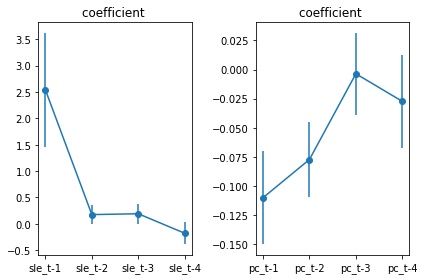

In [23]:
x = [1,2,3,4]
y = [2.54,0.174,0.19,-0.18]

# example error bar values that vary with x-position
error = [1.08,0.174,0.19,0.21]

x1 = [1,2,3,4]
y1 = [-0.11,-0.0772,-0.0036,-0.0273]
error1 = [0.040,0.032,0.035,0.040]

plt.subplot(121)
plt.errorbar(x, y, yerr=error, fmt='-o')
plt.title('coefficient ')
plt.xticks([1, 2, 3,4], ['sle_t-1', 'sle_t-2', 'sle_t-3','sle_t-4'])
plt.subplot(122)
plt.errorbar(x1,y1,yerr= error1,fmt='-o')
plt.title('coefficient ')
plt.xticks([1, 2, 3,4], ['pc_t-1', 'pc_t-2', 'pc_t-3','pc_t-4'])
plt.tight_layout()